# Forest Covertype

### Data Set Information:

Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).

Some background information for these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value.

As for primary major tree species in these areas, Neota would have spruce/fir (type 1), while Rawah and Comanche Peak would probably have lodgepole pine (type 2) as their primary species, followed by spruce/fir and aspen (type 5). Cache la Poudre would tend to have Ponderosa pine (type 3), Douglas-fir (type 6), and cottonwood/willow (type 4).

The Rawah and Comanche Peak areas would tend to be more typical of the overall dataset than either the Neota or Cache la Poudre, due to their assortment of tree species and range of predictive variable values (elevation, etc.) Cache la Poudre would probably be more unique than the others, due to its relatively low elevation range and species composition.

Source: https://archive.ics.uci.edu/ml/datasets/covertype

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp
%matplotlib inline

# Set random seed to ensure reproducability
random_state = 42

## Exploratory Data Analysis

10 numerical,
44 binary and
1 class variable with 7 distinct classes

In [2]:
# Column names extracted from the dataset description file
columns = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", 
         "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", 
         "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", 
         "Horizontal_Distance_To_Fire_Points", "Rawah", "Neota", "Comanche Peak", "Cache la Poudre"] + \
       ["Soil_Type {}".format(i) for i in range(40)] + ["Cover_Type"]

In [3]:
data = pd.read_csv('dataset/covtype.data', header=None, names=columns)
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Rawah                                 581012 non-null int64
Neota                                 581012 non-null int64
Comanche Peak                         581012 non-null int64
Cache la Poudre                       581012 non-null int64
Soil_Type 0                           581012 non-

There are no missing values and datatypes are also in desireable format. Let's investigate distributions of numerical variables.

In [5]:
# Setting display format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Extracting columns containing numerical values
numerical = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
             'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
             'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

# Describing numerical variables
data[numerical].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00
mean,2959.37,155.66,14.10,269.43,46.42,2350.15,212.15,223.32,142.53,1980.29
std,279.98,111.91,7.49,212.55,58.30,1559.25,26.77,19.77,38.27,1324.20
min,1859.00,0.00,0.00,0.00,-173.00,0.00,0.00,0.00,0.00,0.00
25%,2809.00,58.00,9.00,108.00,7.00,1106.00,198.00,213.00,119.00,1024.00
50%,2996.00,127.00,13.00,218.00,30.00,1997.00,218.00,226.00,143.00,1710.00
75%,3163.00,260.00,18.00,384.00,69.00,3328.00,231.00,237.00,168.00,2550.00
max,3858.00,360.00,66.00,1397.00,601.00,7117.00,254.00,254.00,254.00,7173.00


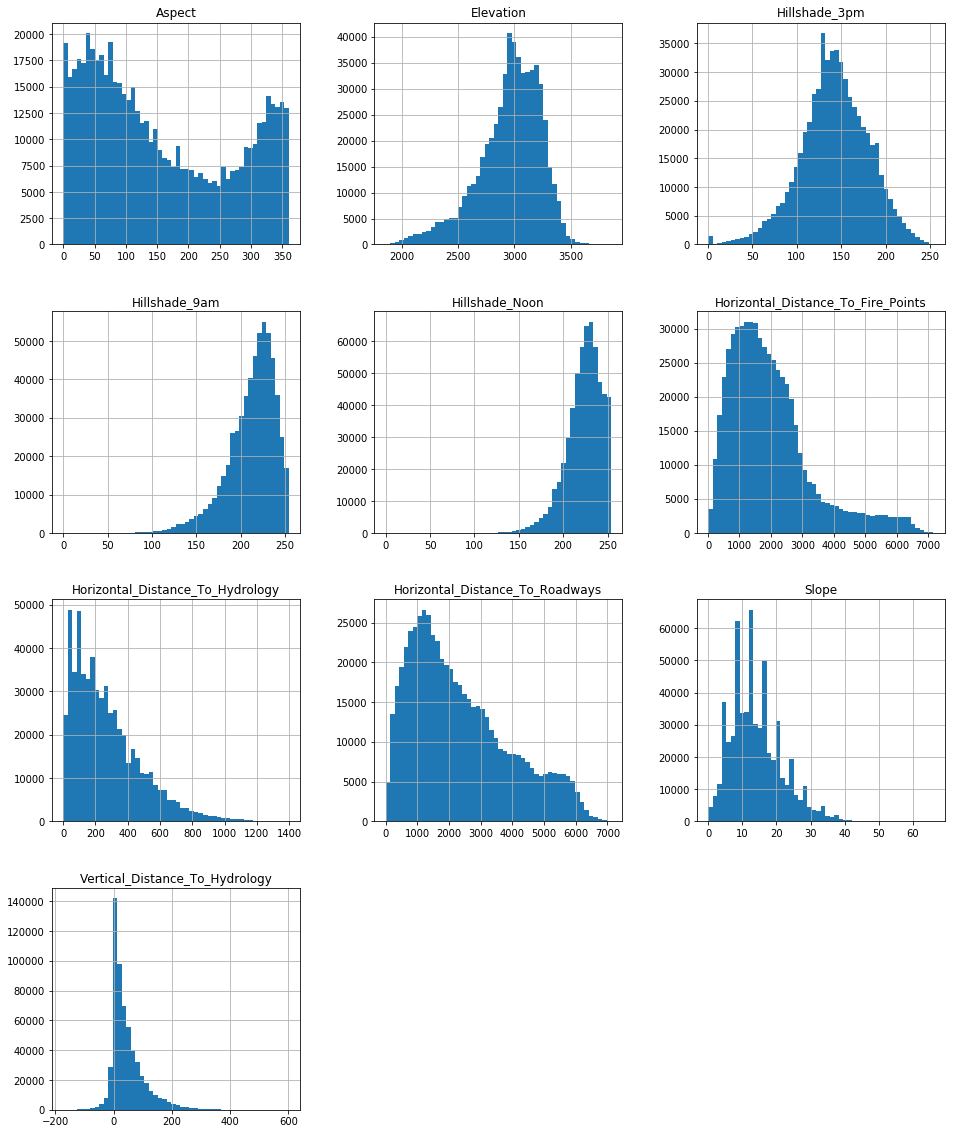

In [6]:
data[numerical].hist(figsize=(16, 20), bins=50);

There doesn't seem to be clear outliers. Next we can plot counts of binary features.

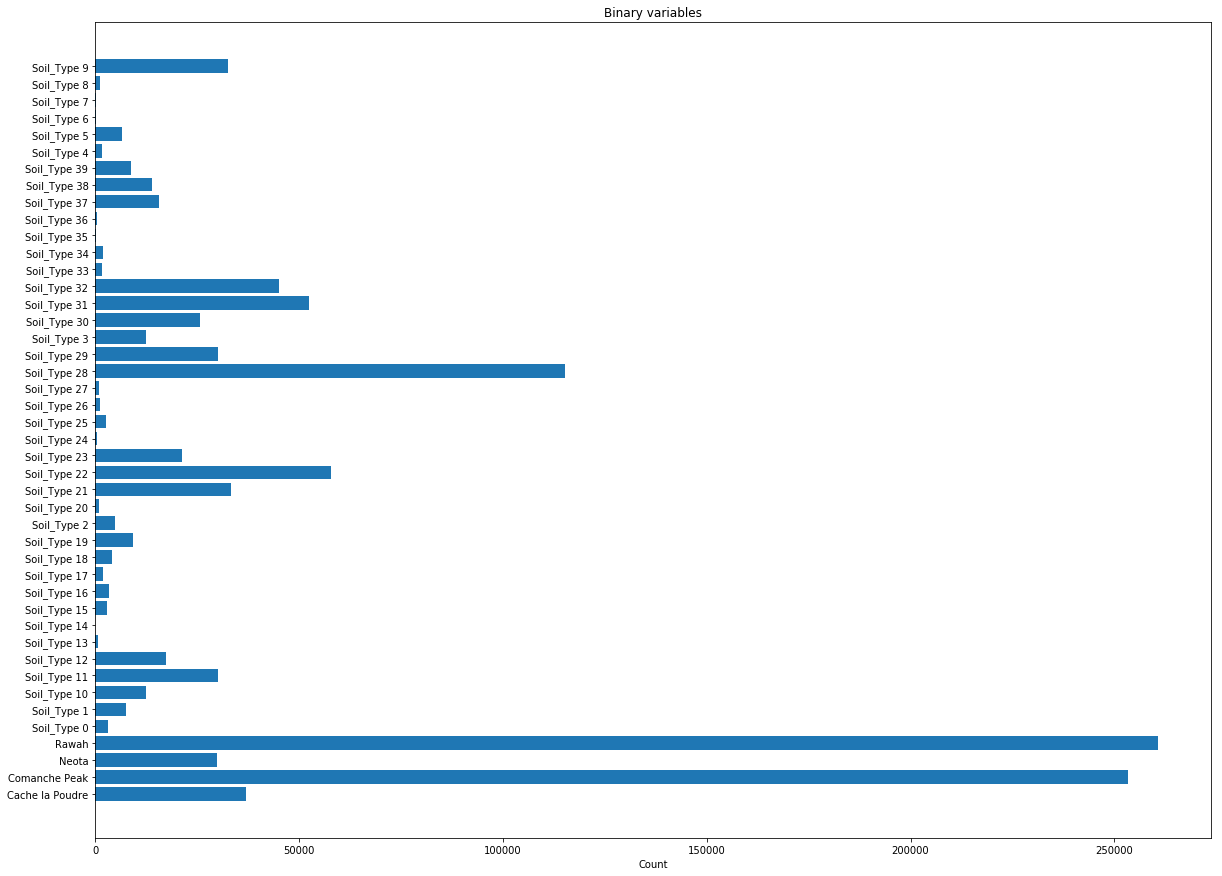

In [7]:
# Extracting binary feature column names
binary = data.iloc[:,10:54].columns.values.tolist()

# Counting binary variables
counts = data[binary][data[binary] == 1].count()

fig, ax = plt.subplots(figsize=(20, 15))
plt.barh(counts.index, counts.iloc[0:])
plt.xlabel('Count')
plt.title('Binary variables')
plt.show()

Plotting class distribution

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64


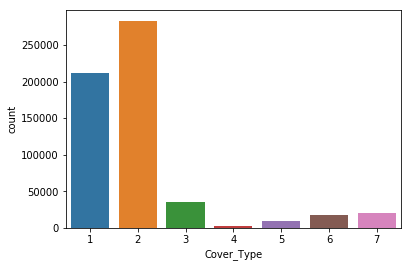

In [8]:
sns.countplot(data.Cover_Type);
print(data.Cover_Type.value_counts())

As we can see, the dataset is highly unbalanced. We need to undersample majority classes in order not to skew performance of classifiers. Lets undersample all classes to include => 10k samples. We can also use SMOTE for the class number 4, in order to make the dataset fully balanced.

In [10]:
# Creating copy of dataframe for further use
data_copy = data.copy()

# Splitting dataset into feature and target variables
y = data.pop('Cover_Type')
X = data
labels = data.columns

In [13]:
# Run this sell twice, unclear why throws error on the first run
from imblearn.over_sampling import SMOTE

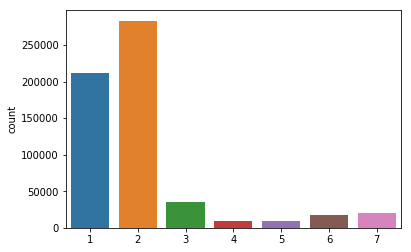

In [14]:
# SMOTE for oversampling class number 4 to include as many observations as class 5 (new minority class)
sm = SMOTE(sampling_strategy={4: 9493}, random_state=random_state)
X_resampled, y_resampled = sm.fit_resample(X, y)

sns.countplot(y_resampled);

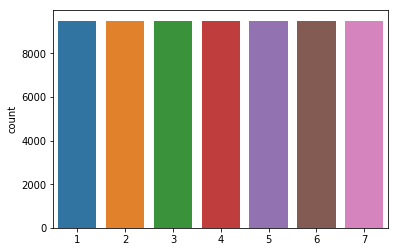

In [15]:
from imblearn.under_sampling import RandomUnderSampler

# Randomly undersampling rest of the classes
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=random_state)
X_rus, y_rus = rus.fit_sample(X_resampled, y_resampled)

sns.countplot(y_rus);

All classes are now sampled, now we can explore feature distributions again.

In [16]:
X = pd.DataFrame(X_rus, columns=labels)
y = pd.DataFrame(y_rus, columns=['Cover_Type'])

In [17]:
X[numerical].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,66451.00,66451.00,66451.00,66451.00,66451.00,66451.00,66451.00,66451.00,66451.00,66451.00
mean,2748.11,156.31,16.52,228.20,50.99,1716.93,212.75,218.90,134.80,1520.62
std,418.07,109.71,8.45,209.75,60.96,1330.06,30.53,22.80,46.05,1104.26
min,1863.00,0.00,0.00,0.00,-152.00,0.00,0.00,87.00,0.00,0.00
25%,2375.00,65.00,10.00,67.00,5.00,752.00,196.00,207.00,106.00,741.00
50%,2752.00,126.00,15.00,180.00,32.00,1315.00,220.00,222.00,138.00,1273.00
75%,3108.00,258.00,22.00,330.00,79.00,2290.00,236.00,235.00,167.00,1997.00
max,3858.00,360.00,54.00,1397.00,550.00,7039.00,254.00,254.00,252.00,7141.00


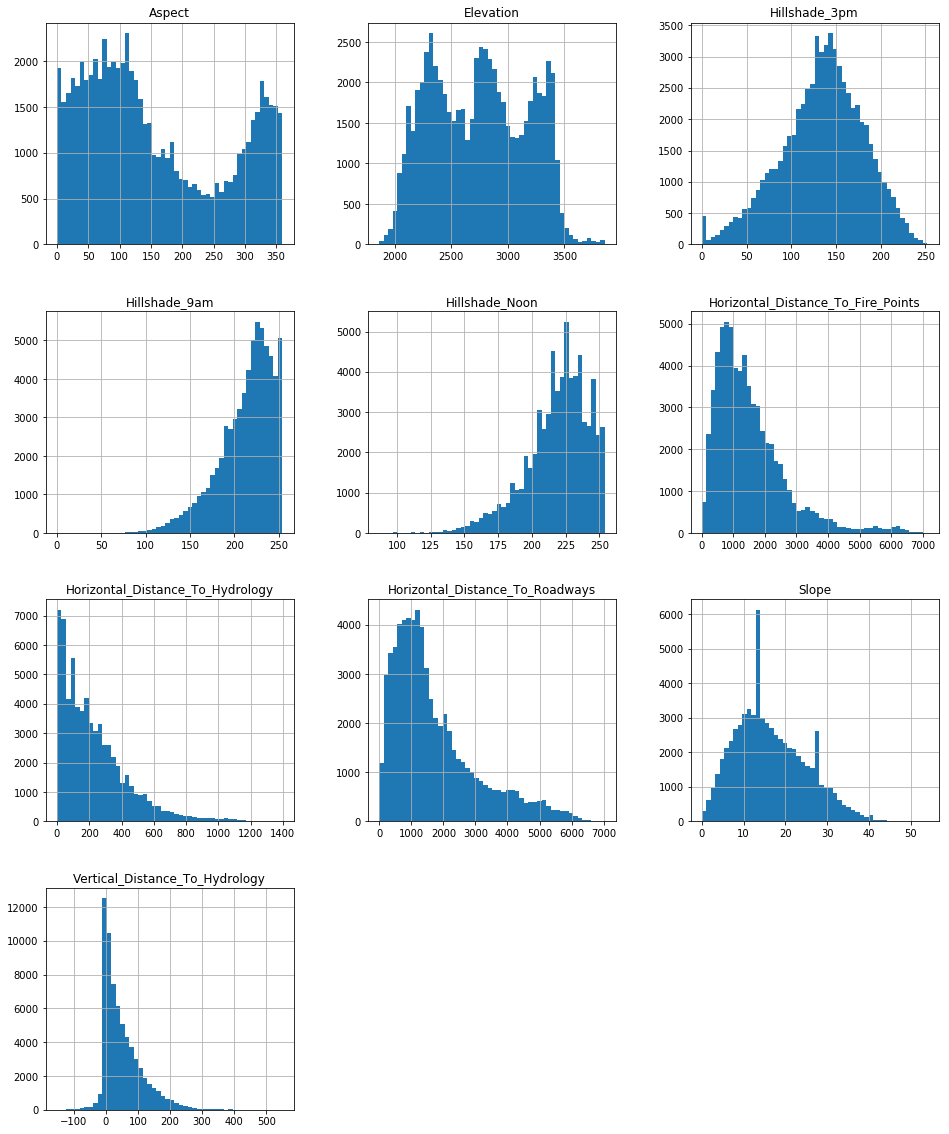

In [19]:
X[numerical].hist(figsize=(16, 20), bins=50);

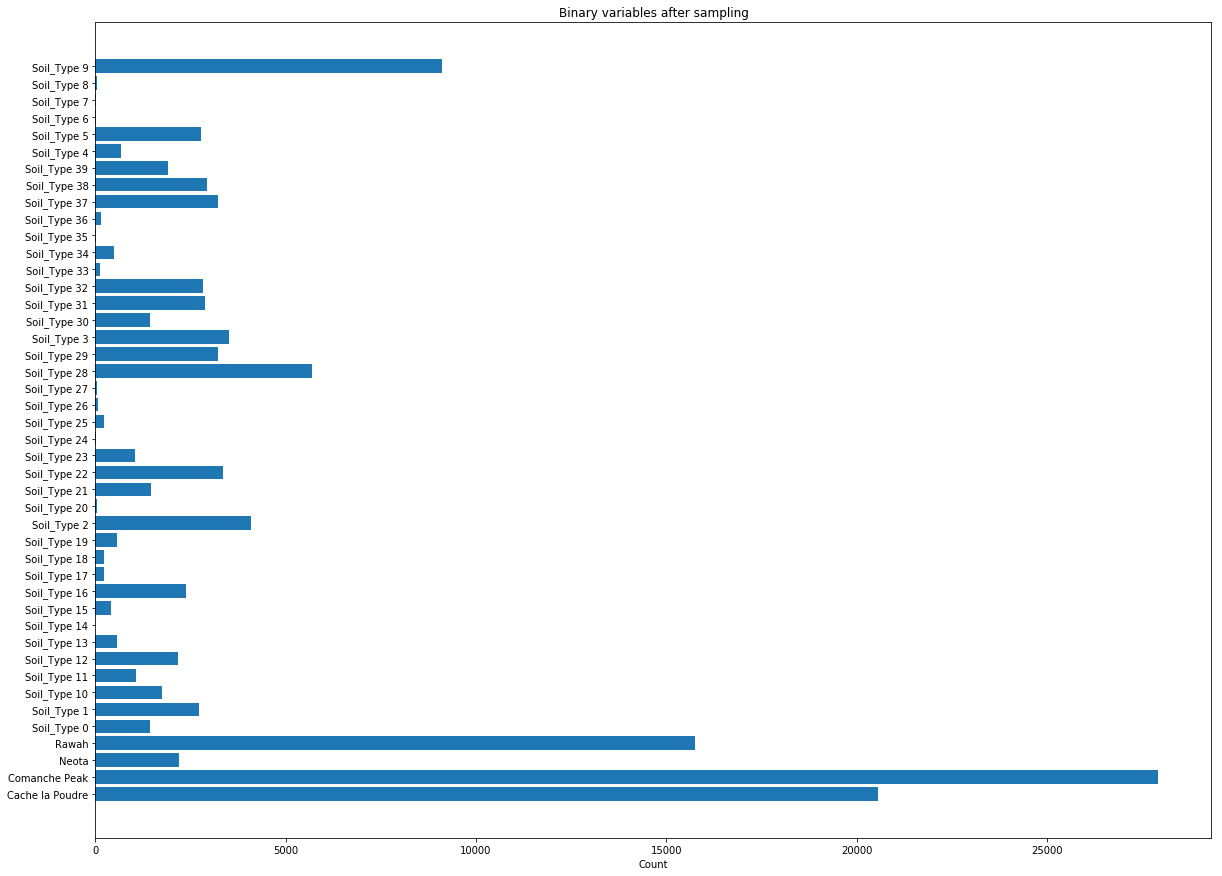

In [18]:
# Extracting binary feature column names
binary = X.iloc[:,10:54].columns.values.tolist()

# Counting binary variables
counts = X[binary][X[binary] == 1].count()

fig, ax = plt.subplots(figsize=(20, 15))
plt.barh(counts.index, counts.iloc[0:])
plt.xlabel('Count')
plt.title('Binary variables after sampling')
plt.show()

 Next we can plot correlation matrix to study correlations

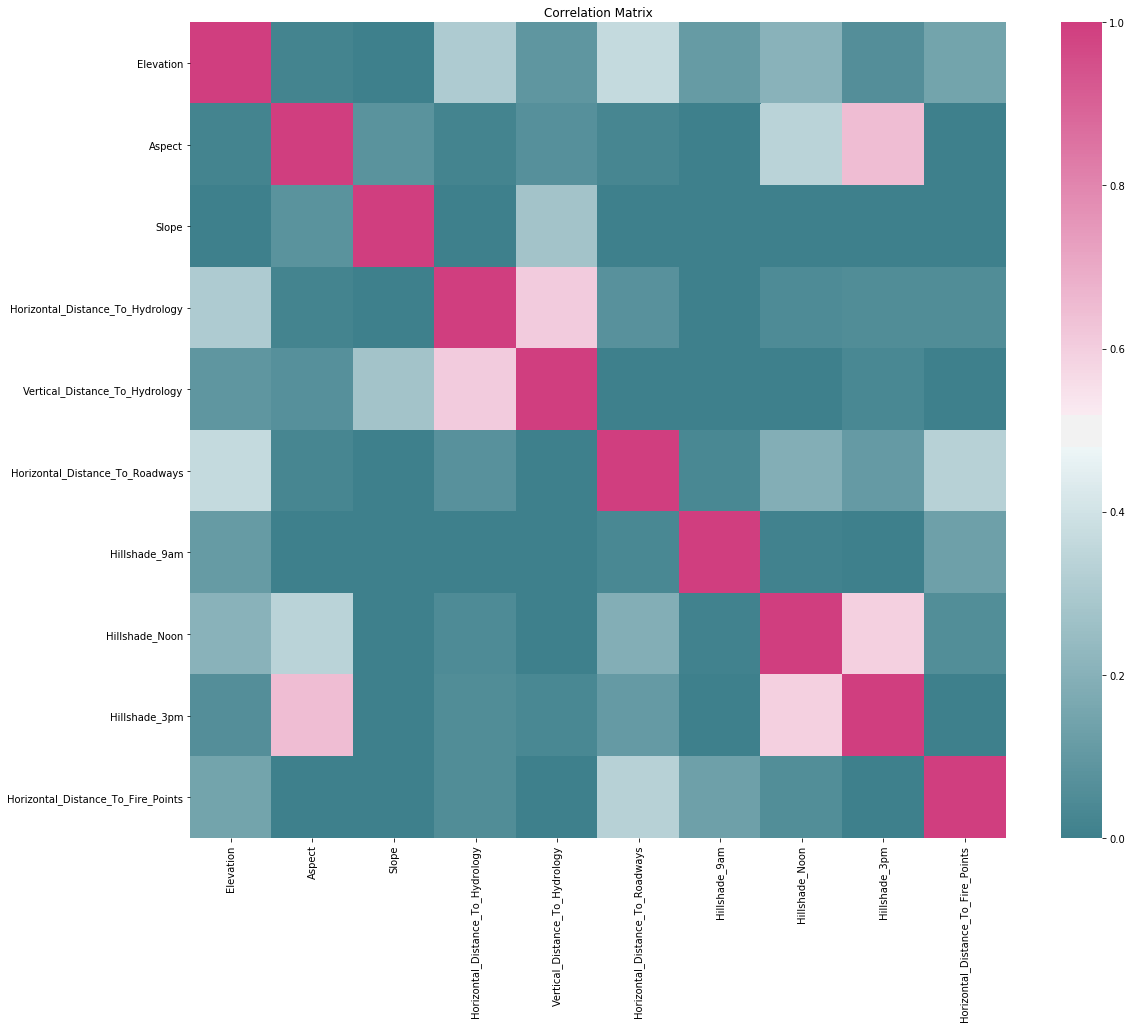

In [20]:
fig, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, as_cmap=True)

# Calculate correlations
corr = data[numerical].corr()

ax = sns.heatmap(data=corr, vmin=0, vmax=1, square=True, cmap=cmap)
ax.set(title='Correlation Matrix')
plt.show()

There seems not to be too high correlation between variables, which is good for classifier performance. All features have some value in constructing the model.

## Unsupervised Learning

### Data Preparation

Subsampling data to hold 10k observations

In [50]:
data = data_copy

class_size = 10000
df = data.groupby("Cover_Type").apply(lambda x: x.sample(min(class_size, len(x)))).reset_index(1)
df = df.drop(columns=["Cover_Type"]).reset_index().drop(columns=["level_1"])

X = df.loc[:, df.columns != 'Cover_Type']
y = df[["Cover_Type"]]

In [51]:
# Getting binary columns
binX = X.iloc[:,10:54]

In [52]:
# Getting numerical columns
numX = X.loc[:, numerical]
numX = pd.concat([numX, y], axis=1)

In [54]:
dumX = pd.DataFrame()

for col in numX:
    cutdf = pd.cut(numX[col], 3, labels=[0, 1, 2])
    dummydf = pd.get_dummies(cutdf)
    dummydf.columns = ["0_low", "1_mid", "2_high"]
    dumX = pd.concat([dumX, dummydf], axis=1)

In [56]:
print("Shape of the dummyfied dataset:", dumX.shape)
print("Shape of the binary dataset: ", binX.shape)

Shape of the dummyfied dataset: (62240, 33)
Shape of the binary dataset:  (62240, 44)


In [57]:
allX = pd.concat([dumX, binX], axis=1)

### Association Rules

In [59]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelBinarizer

frequent_itemsets = {}
minpaterns = 10
minsup = 0.9
classrules = None
while minsup > 0:    
    minsup = minsup * 0.9
    frequent_itemsets = apriori(allX, min_support=minsup, use_colnames=True, verbose=3)
    
    if len(frequent_itemsets) < 1:
        continue
    
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
    classrules = rules[rules['consequents'] == {'Cover_Type'}]
    
    print("Minsup {} found {} patterns out of which {} contain class consequent"
          .format(minsup, len(frequent_itemsets), len(classrules)))  
    
    if len(classrules) >= 100:
        print("Found {} rules which have Cover_Type as consequent.".format(len(classrules)))
        break;
    
    if len(frequent_itemsets) >= minpaterns:
        print("Minimum support:", minsup)
        print("Number of found patterns:", len(frequent_itemsets))
        break

ModuleNotFoundError: No module named 'mlxtend'

$$\text{Workflow of getting the rules into }\LaTeX$$
1. Generate this csv as shown below
2. Copy it to the https://www.tablesgenerator.com/latex_tables and under File->Paste table data paste the data
3. Copy the data to the Latex
4. Replace "-" with \\ to do the line breaks
5. Style the table and resize it correctly

In [60]:
select = rules
select = select.sort_values(by=["confidence", "support", "leverage"], ascending=False)\
    [["antecedents", "consequents", "confidence", "support", "leverage"]].head(5).round(3)

select = select.rename(columns={"confidence": "conf", "support": "supp", "leverage": "lever"})
print(select.to_csv(index=False, sep=";").replace("frozenset({", "").replace("})", "").replace("'", "")\
     .replace(", ", "-"))

NameError: name 'rules' is not defined

### Clustering

In [64]:
data = data_copy

# Subsampling the data even more
class_size = 500
df = data.groupby("Cover_Type").apply(lambda x: x.sample(min(class_size, len(x)))).reset_index(1)
df = df.drop(columns=["Cover_Type"]).reset_index().drop(columns=["level_1"])

X = df.loc[:, df.columns != 'Cover_Type']
y = df[["Cover_Type"]]

binX = X.iloc[:,10:54]
numX = X.loc[:, numerical]
cdf = pd.concat([binX, numX], axis=1)

Standardizing data is recommended because otherwise the range of values in each feature will act as a weight when determining how to cluster data, which is typically undesired.

In [63]:
from sklearn.preprocessing import StandardScaler

nX = pd.DataFrame(StandardScaler().fit_transform(numX), columns=numX.columns)

C:\Users\joona\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\joona\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Aglomerative Clustering

In [65]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans

def dendrogram_plot(data, link="single", metric="euclidean"):
    linkageMatrix = linkage(data, link, metric=metric)

    plt.xlabel('point index')
    plt.ylabel('distance')
    dendrogram(linkageMatrix, truncate_mode='lastp', p=64,
        leaf_rotation=90., leaf_font_size=8.)

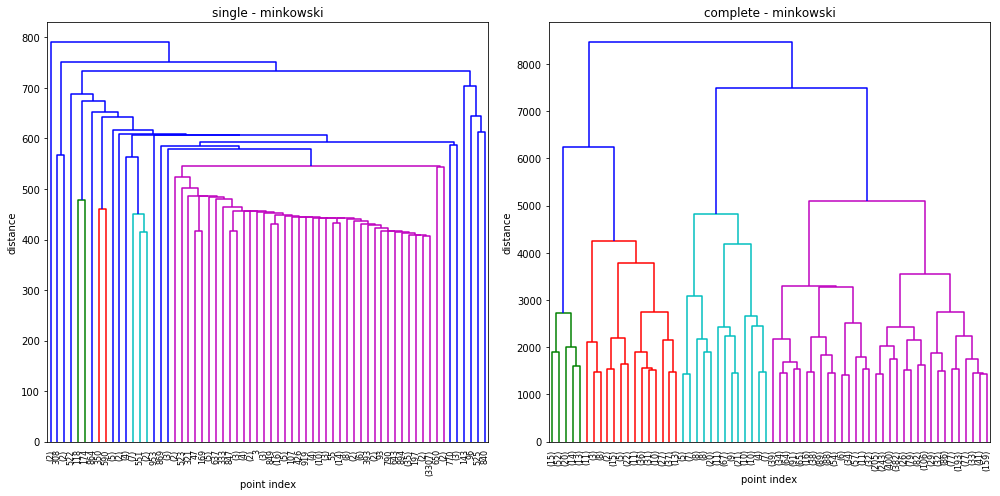

In [67]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("single - minkowski")
dendrogram_plot(cdf, "single", "minkowski")
plt.subplot(1, 2, 2)
plt.title("complete - minkowski")
dendrogram_plot(cdf, "complete", "minkowski")
plt.tight_layout()
plt.show()

In [68]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

linkageMatrix = linkage(cdf, "complete", metric="minkowski")
clusters = fcluster(linkageMatrix, 7, criterion='maxclust')

# Save the cluster number to the standardized dataset
clustered = cdf.copy()
clustered["cluster"] = clusters

# Generate a different color for each cluster
cm = matplotlib.cm.get_cmap("Accent")
colors = cm(np.linspace(0, 1, len(np.unique(clusters))))

# Reduce the dimensionality to 2D and plot the clusters.
transformed = PCA(n_components=2).fit_transform(clustered.drop(columns=["cluster"]))
transformed = pd.DataFrame(transformed, columns=["x", "y"])
transformed["class"] = y
transformed["cluster"] = clusters
transformed["color"] = transformed.cluster.apply(lambda x: colors[x-1])

transformedS = TSNE(n_components=2).fit_transform(clustered.drop(columns=["cluster"]))
transformedS = pd.DataFrame(transformedS, columns=["x", "y"])
transformedS["class"] = y
transformedS["cluster"] = clusters
transformedS["color"] = transformedS.cluster.apply(lambda x: colors[x-1])

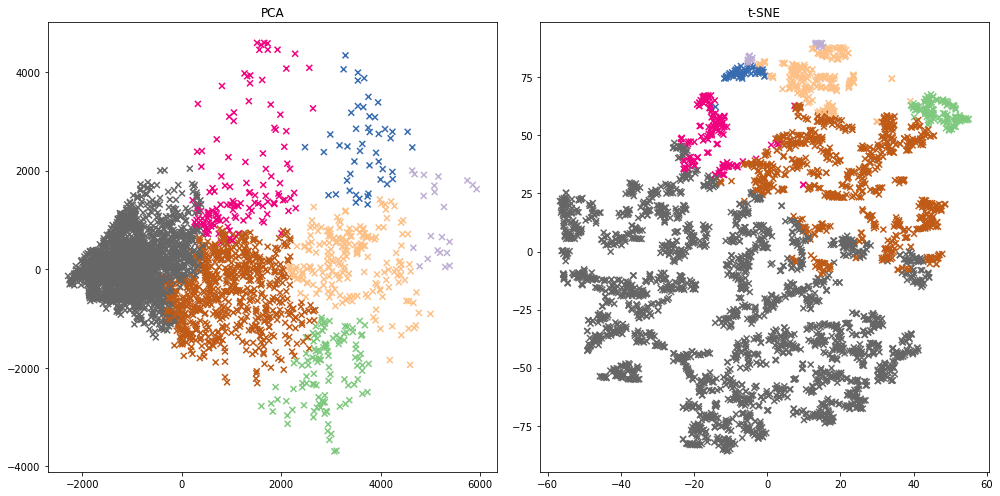

In [69]:
# Plot the clusters with different colors
plt.figure(figsize=(14, 7))
ax = plt.subplot(1, 2, 1)
plt.title("PCA")
plt.scatter(transformed.x, transformed.y, c=transformed.color, marker="x")
ax = plt.subplot(1, 2, 2)
plt.title("t-SNE")
plt.scatter(transformedS.x, transformedS.y, c=transformedS.color, marker="x")
plt.tight_layout()
plt.show()

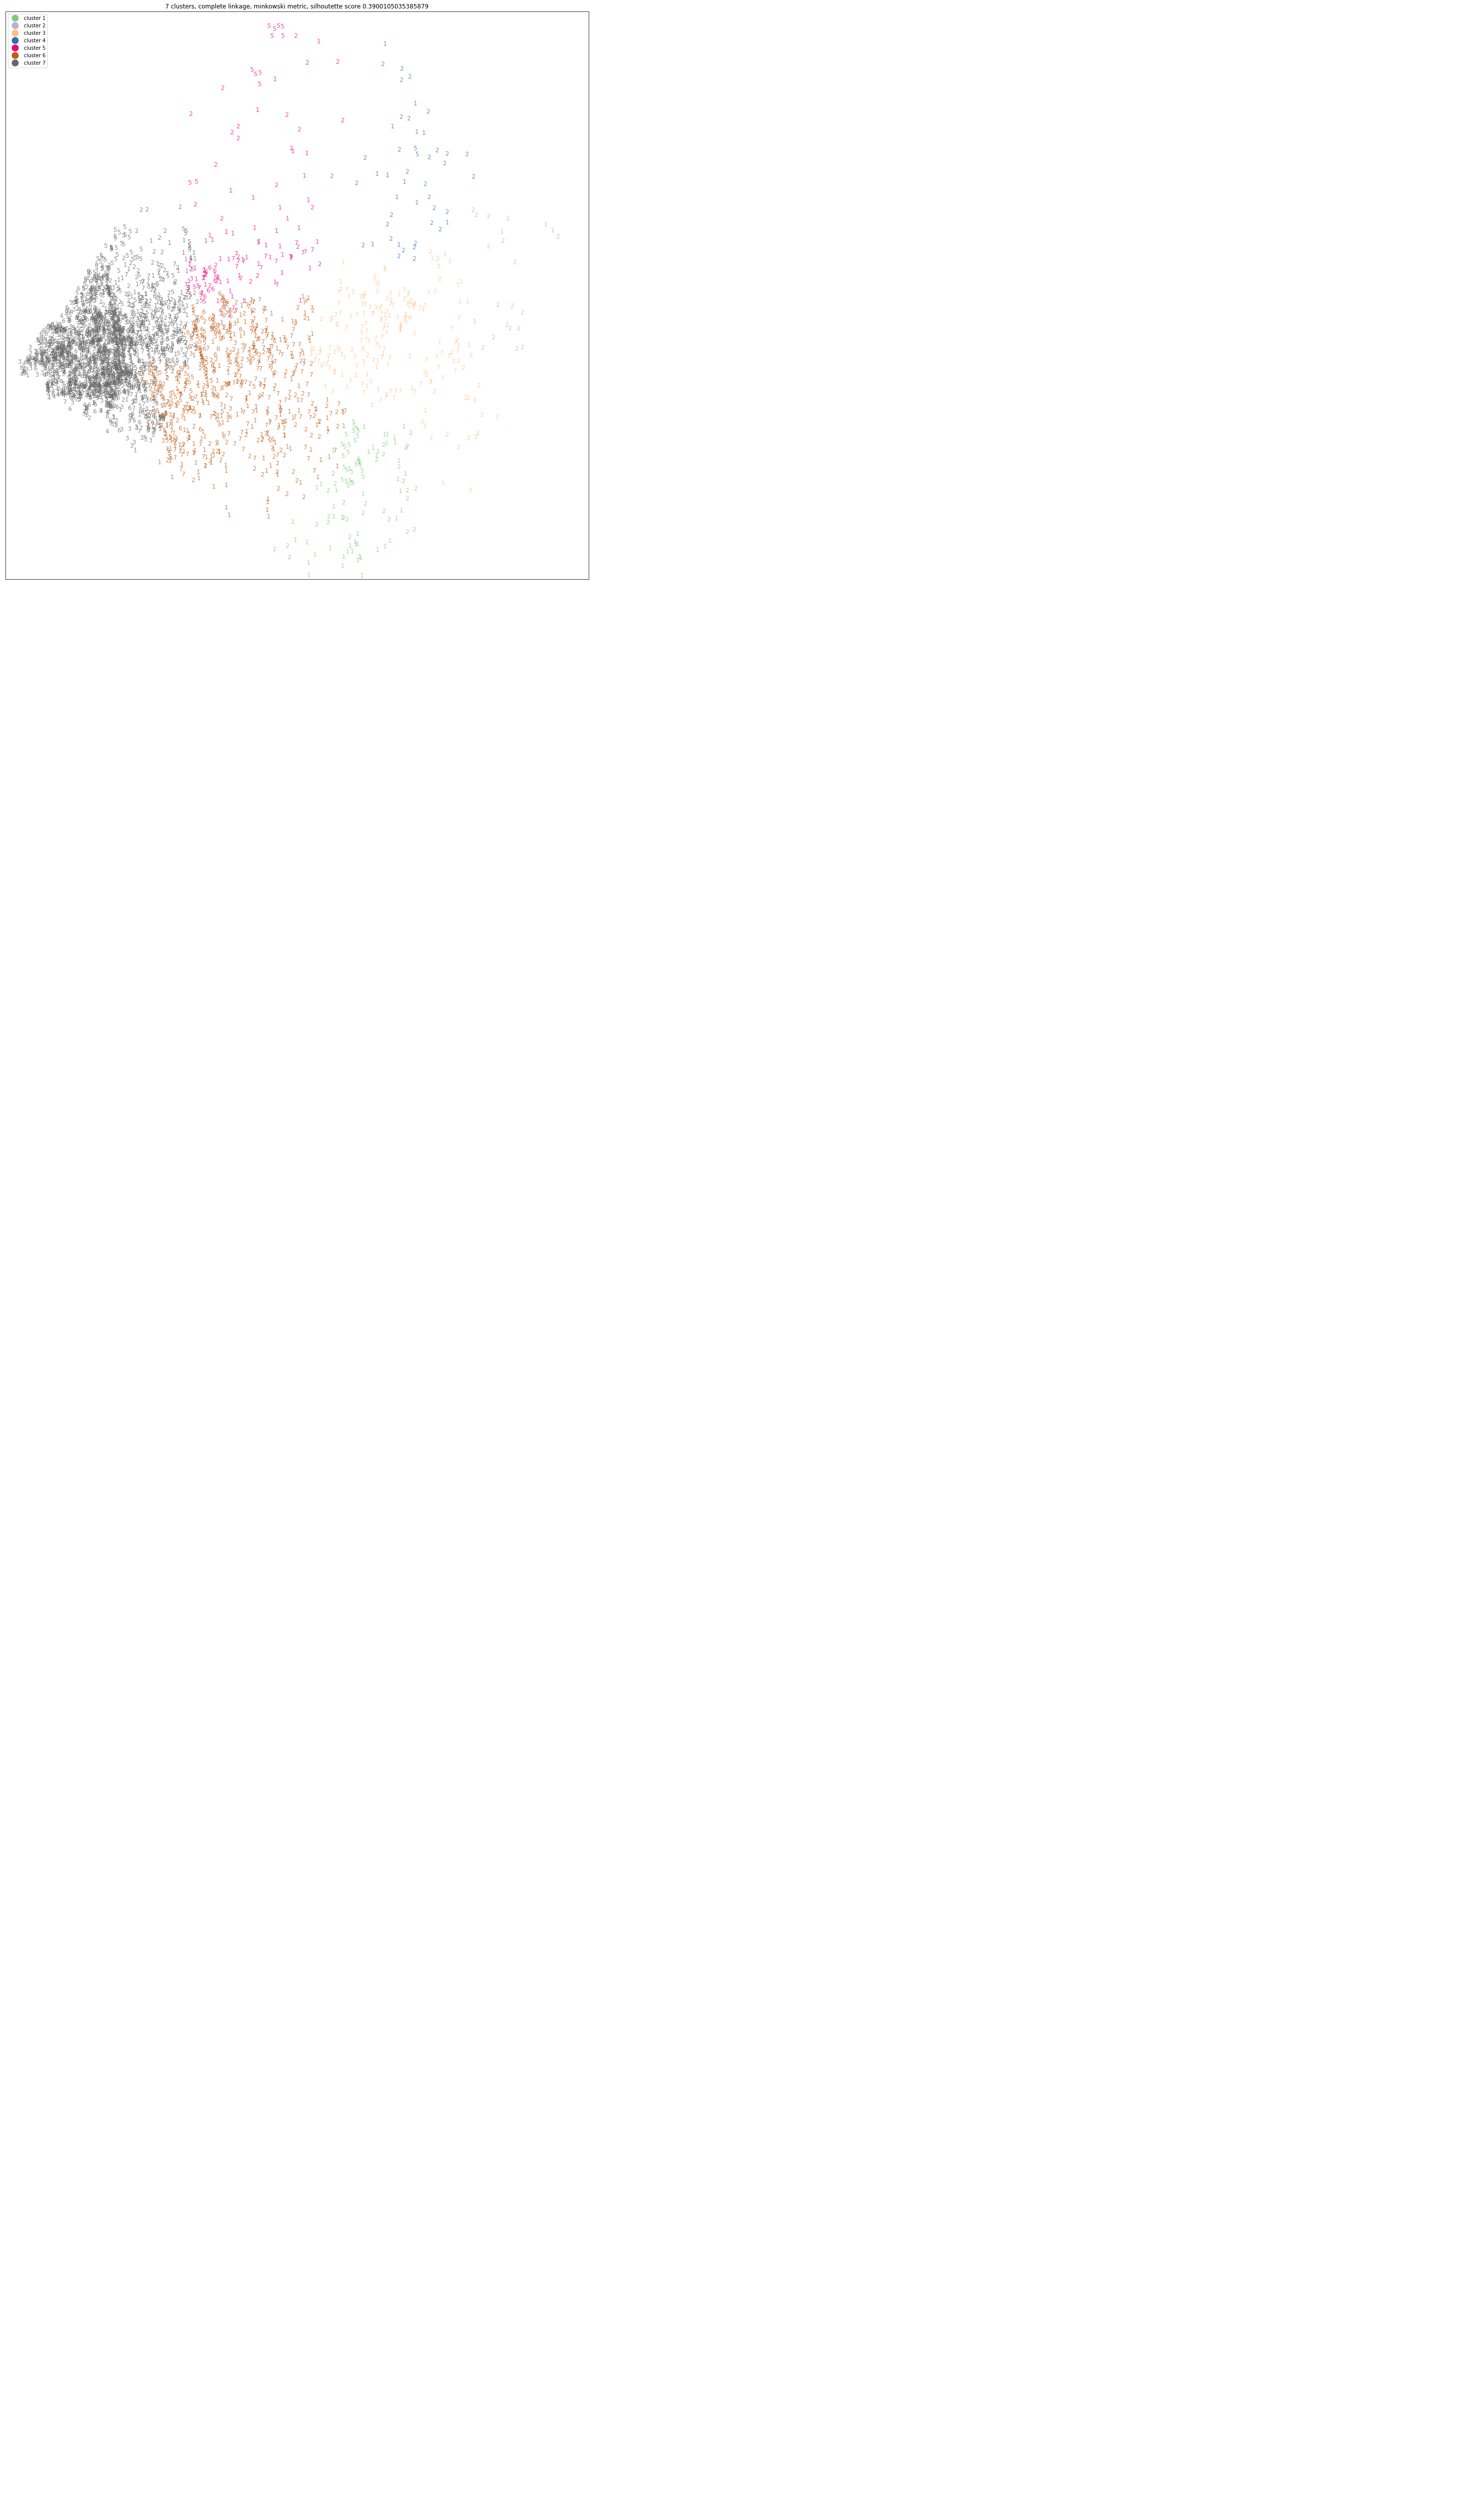

In [70]:
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D


# Calculate the silhouette score
score = silhouette_score(cdf, clusters)

fig, ax = plt.subplots(figsize=(21, 21))
ax.set_xlim(-2500, 6400)
ax.set_ylim(-3200, 4800)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("7 clusters, complete linkage, minkowski metric, silhoutette score " + str(score))

#loop through labels and plot each cluster
for i, label in enumerate(np.unique(clusters)):
    for l, row in transformed.loc[transformed['cluster']==label,:].iterrows():
        plt.annotate(row['class'], 
                     (row['x'], row['y']),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=12,
                     color=row["color"], alpha=0.75) 
        
        
legend_elements = []
for c in np.unique(clusters):
    color = colors[c-1]
    legend_elements.append(\
        Line2D([0], [0], marker='o', color="w", label=("cluster " + str(c)), 
               markerfacecolor=color ,markersize=15)
    )
         
plt.legend(handles=legend_elements, loc="upper left")
plt.show()

### KMeans Clustering

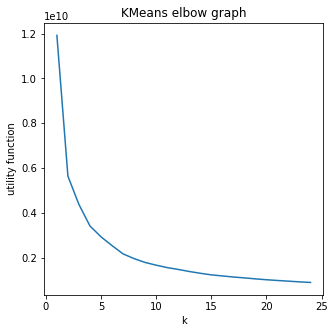

In [71]:
def elbow_plot(data):
    inertia = []
    for i in range(1,25):
        kmeans = KMeans(n_clusters=i, random_state=420)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.plot(range(1,25), inertia)
    plt.xlabel("k")
    plt.ylabel('utility function')
    return plt

plt.figure(figsize=(5, 5))
plt.title("KMeans elbow graph")
elbow1 = elbow_plot(cdf)
plt.show()

In [72]:
clusters = KMeans(n_clusters=7, init='k-means++', random_state=420).fit_predict(cdf)
transformedK = PCA(n_components=2).fit_transform(cdf)

colors = cm(np.linspace(0, 1, len(np.unique(clusters))))
transformedK = pd.DataFrame(transformedK, columns=["x", "y"])
transformedK["class"] = y.values
transformedK["cluster"] = clusters
transformedK["color"] = transformedK.cluster.apply(lambda x: colors[x-1])

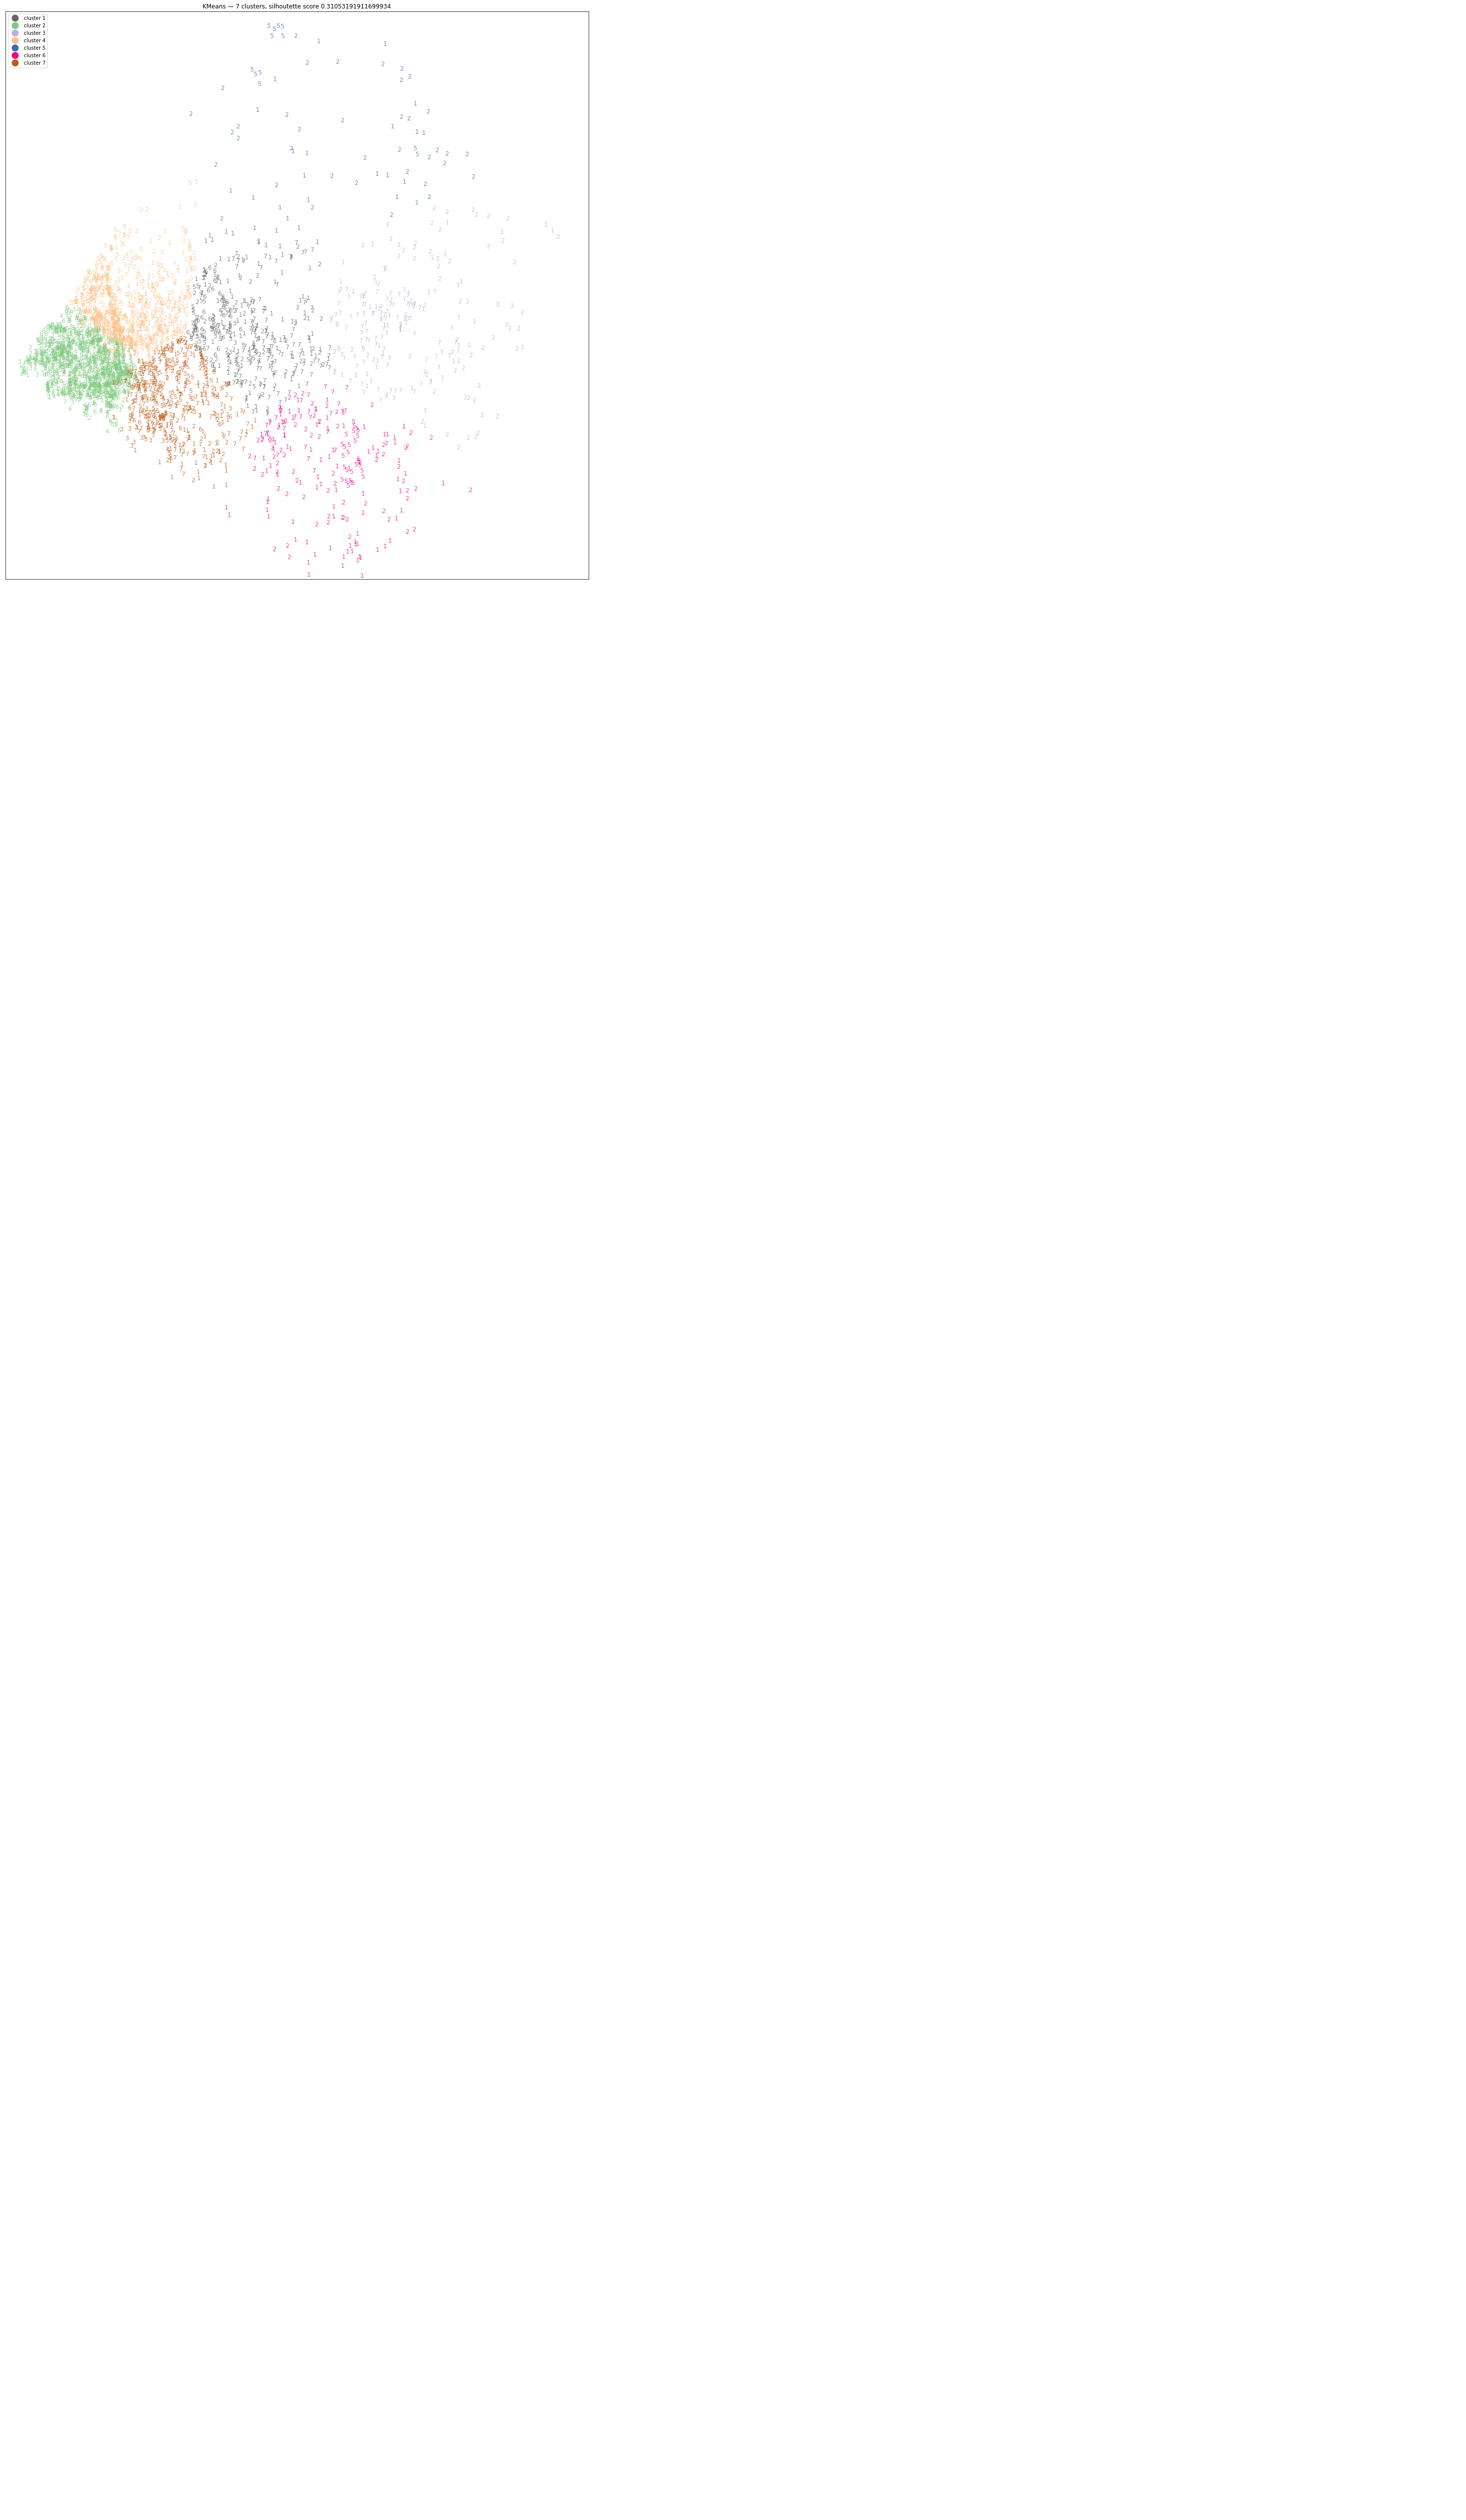

In [75]:
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D

# Calculate the silhouette score
score = silhouette_score(cdf, clusters)

fig, ax = plt.subplots(figsize=(21, 21))
ax.set_xlim(-2500, 6400)
ax.set_ylim(-3200, 4800)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("KMeans — 7 clusters, silhoutette score " + str(score))

#loop through labels and plot each cluster
for i, label in enumerate(np.unique(clusters)):
    for l, row in transformedK.loc[transformedK['cluster']==label,:].iterrows():
        plt.annotate(row['class'], 
                     (row['x'], row['y']),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=12,
                     color=row["color"], alpha=0.75) 
        
        
legend_elements = []
for c in np.unique(clusters):
    color = colors[c-1]
    legend_elements.append(\
        Line2D([0], [0], marker='o', color="w", label=("cluster " + str(c+1)), 
               markerfacecolor=color ,markersize=15)
    )
         
plt.legend(handles=legend_elements, loc="upper left")
plt.show()

In [76]:
targetnames = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"
}

# kmeans
transformedK["classname"] = transformedK["class"].apply(lambda x: targetnames[x])

# aglomerative
transformed["classname"] = transformed["class"].apply(lambda x: targetnames[x])

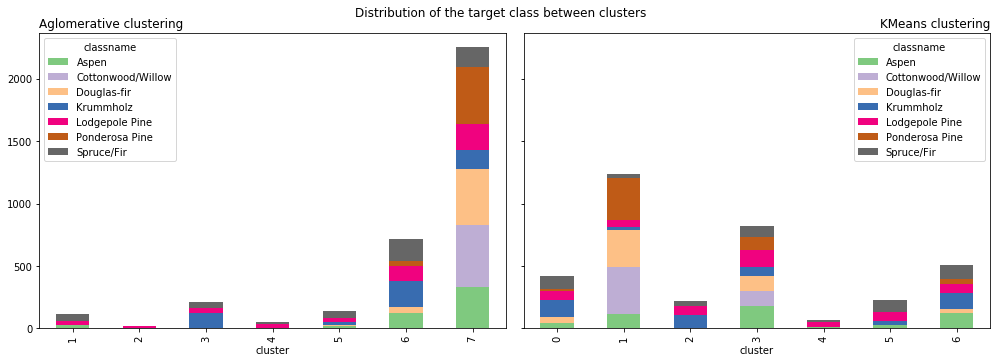

In [77]:
plt.figure(figsize=(14, 5))
plt.suptitle("Distribution of the target class between clusters", y=1.00)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, sharey=ax1)

transformed.groupby(by=["cluster", "classname"]).count().color.unstack().fillna(0)\
    .plot(kind="bar", stacked=True, ax=ax1, color=colors)
ax1.set_title("Aglomerative clustering", loc="left")

transformedK.groupby(by=["cluster", "classname"]).count().color.unstack().fillna(0)\
    .plot(kind="bar", stacked=True, ax=ax2, color=colors)
ax2.set_title("KMeans clustering", loc="right")
plt.tight_layout()
plt.show()

## Supervised Learning

## Train/Test split

In [ ]:
from sklearn.model_selection import train_test_split

# Sizes of different sets
test_size = 0.2
train_size = 0.8

trnX, tstX, trnY, tstY = train_test_split(X, y, test_size=test_size, random_state=random_state)

## Classification

We will be using RandomizedSearchCV for tuning hyperparameters and finding roughly best performing parameters for our models. Because target classes are balanced, we can use accuracy score (default scoring method of most classifiers) for finding these hyperparameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelBinarizer, label_binarize
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

In [ ]:
gnb = cross_val_score(GaussianNB(), trnX, trnY.ravel(), cv=5)

print("Classifier accuracy: %0.4f (+/- %0.4f)" % (gnb.mean(), gnb.std() * 2))

Classifier accuracy: 0.5988 (+/- 0.0057)

### KNN

In [ ]:
grid = {'n_neighbors':[5, 10, 15, 20, 25, 30],
        'metric':['minkowski', 'manhattan']}

knn = RandomizedSearchCV(KNeighborsClassifier(), 
                         grid, cv=5, n_iter=10,
                         random_state=random_state)

knn.fit(trnX, trnY.ravel())

print("Classifier best score: %.4f for parameters: %s" % (knn.best_score_.mean(), knn.best_params_))

Classifier best score: 0.8843 for parameters: {'n_neighbors': 5, 'metric': 'minkowski'}

In [ ]:
# Scaling data to mean of 0 and std of 1
scaler = StandardScaler(with_mean=0, with_std=1).fit(trnX)
trnX_scaled = scaler.transform(trnX)

knn = cross_val_score(KNeighborsClassifier(n_jobs=-1), trnX_scaled, trnY.ravel(), cv=5)

print("Classifier best score: %.4f" % (knn.mean()))

Classifier best score: 0.8511

### Desicion Tree

In [ ]:
grid = {'criterion':['gini', 'entropy'],
        'min_samples_split': [3, 5, 7, 9, 11, 13, 15],
        'min_samples_leaf': [3, 5, 7, 9, 11, 13, 15],
        'max_depth': np.arange(3, 15, 1)}

dtc = RandomizedSearchCV(DecisionTreeClassifier(),
                         grid, cv=5, n_iter=10,
                         random_state=random_state)

dtc.fit(trnX, trnY)

print("Classifier best score: %.4f for parameters: %s" % (dtc.best_score_.mean(), dtc.best_params_))

Classifier best score: 0.8408 for parameters: {'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 14, 'criterion': 'entropy'}

### RandomForest

In [ ]:
grid = {'n_estimators': np.arange(10, 300, 10),
        'max_features': ['auto', 'sqrt'],
       'max_depth': np.arange(1, 15, 1),
        'min_samples_split': np.arange(2, 15, 1)}

rfc = RandomizedSearchCV(RandomForestClassifier(),
                         grid, cv=5, n_iter=10,
                         random_state=random_state)

rfc.fit(trnX, trnY.ravel())

print("Classifier best score: %.4f for parameters: %s" % (rfc.best_score_.mean(), rfc.best_params_))

Classifier best score: 0.8421 for parameters: {'n_estimators': 290, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 12}

### XGBoost

In [ ]:
grid = {"n_estimators": [80 ,100, 120],
        "learning_rate": [0.2, 0.25, 0.3],
        "max_depth": [5, 7, 9, 11],
        "min_child_weight": [2, 2.5, 3],
        "gamma": [0.5, 0.55, 0.6]}

xgb_clf = RandomizedSearchCV(XGBClassifier(), grid, cv=5, verbose=0, n_jobs=-1, n_iter=5).fit(trnX, trnY.ravel())

print("Classifier best score: %.4f for parameters: %s" % (xgb_clf.best_score_.mean(), xgb_clf.best_params_))

Classifier best score: 0.9190 for parameters: {'n_estimators': 120, 'min_child_weight': 2.5, 'max_depth': 11, 'learning_rate': 0.25, 'gamma': 0.6}

## Model Selection

Based on the cross validation scores of training, we choose XGBoost as our classifier. Next we need to test how it performs on the test set. 

In [ ]:
# Plotting results
results = {'GaussianNB':0.5988, 'KNN':0.8843, 'Decision Tree':0.8408, 'Random Forest':0.8421, 'XGBoost':0.9190}

plt.bar(range(len(results)), list(results.values()), align='center')
plt.xticks(range(len(results)), list(results.keys()), rotation='vertical')
plt.show()

## Model Evaluation

We decided to evaluate the final model with ROC AUC score and confusion matrix in combination with accuracy score to better understand model performance. These metrics will helps us also debug model performance if needed.

In [ ]:
# Labels for confusion matrix
labels = ['Spruce', 'Lodgepole', 'Ponderosa', 'Cottonwood', 'Aspen', 'Douglas-fir', 'Krummholz']

# Function for plotting the confusion matrix
def plot_cnf_mtx(cnf_mtx):
    fig, ax = plt.subplots(figsize=(12, 9))
    ax = sns.heatmap(cnf_mtx, annot=True, fmt="d", cbar=False, cmap='Blues', square=True)
    ax = ax.set(title='Confusion Matrix', xlabel='Predicted Label',
                ylabel='True Label', xticklabels=labels,
                yticklabels=labels)

Testing performance on the test set

In [ ]:
xgb_clf = XGBClassifier(n_estimators=120, min_child_weight=2.5, max_depth=11, learning_rate=0.25, gamma=0.6)
xgb_clf.fit(trnX, trnY.ravel())
prdY = xgb_clf.predict(tstX)

print('Testing Accuracy score:  %.4f' % accuracy_score(tstY, prdY))
print('Testing ROC AUC score:  %.4f' % multiclass_roc_auc_score(tstY, prdY))

cnf_mtx = confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)